In [1]:
#imported for system and file managing usage
import sys
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow.keras.optimizers as opt
from keras.callbacks import ModelCheckpoint

#added to access the modules that placed in sub folder
sys.path.append('./modules')

#added to read special fucntions
from data import *
from plotter import *
from balanceData import *
from divideData import *
from models.gru.gru import *
from models.lstm.lstm import *
from models.rnn.simpleRNN import *


# Define some parameters
FUTURE_PERIOD_PREDICT = 1
SEQ_LEN = 20
validation_percent = 15
test_percent = 20
EPOCHS = 50
BATCH_SIZE = 256


filePath = '/home/cryptocurrency_Forcasting/dataset/Binance_BTCUSDT_1hour.csv'

# Read the data from .csv
data = readData(filePath, FUTURE_PERIOD_PREDICT)

# divide data to train, validation, test sets 
train_data, validation_data, test_data = divide_data(data, validation_percent, test_percent)

# Select equal number of samples with all labels
x_train, y_train = balance_data(train_data, SEQ_LEN)
x_validation, y_validation = balance_data(validation_data, SEQ_LEN)
x_test, y_test = balance_data(test_data, SEQ_LEN)

# Create the model
model = simpleRNN(x_train)

# Select an optimizer
opt = opt.Adam(learning_rate=0.001, decay=1e-6)

# Compile the model
model.compile(loss='binary_crossentropy',
             optimizer = opt,
             metrics= ['accuracy'])

checkpoint = ModelCheckpoint("models/{}.model".format(f"RNN_Final-{1}"), monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_validation, y_validation), callbacks= checkpoint)




Epoch 1/50
8/8 [==============================] - 95s 775ms/step - loss: 0.7185 - accuracy: 0.5405 - val_loss: 0.6547 - val_accuracy: 0.7565
Epoch 2/50
8/8 [==============================] - 2s 307ms/step - loss: 0.5829 - accuracy: 0.7158 - val_loss: 0.5907 - val_accuracy: 0.8283
Epoch 3/50
8/8 [==============================] - 2s 208ms/step - loss: 0.4784 - accuracy: 0.8355 - val_loss: 0.5215 - val_accuracy: 0.9043
Epoch 4/50
8/8 [==============================] - 1s 185ms/step - loss: 0.4017 - accuracy: 0.8803 - val_loss: 0.4567 - val_accuracy: 0.9065
Epoch 5/50
8/8 [==============================] - 2s 219ms/step - loss: 0.3189 - accuracy: 0.9246 - val_loss: 0.3761 - val_accuracy: 0.9891
Epoch 6/50
8/8 [==============================] - 1s 186ms/step - loss: 0.2590 - accuracy: 0.9369 - val_loss: 0.3323 - val_accuracy: 0.9870
Epoch 7/50
8/8 [==============================] - 2s 241ms/step - loss: 0.2178 - accuracy: 0.9393 - val_loss: 0.2825 - val_accuracy: 0.9891
Epoch 8/50
8/8 [===

Epoch 39/50
8/8 [==============================] - 1s 186ms/step - loss: 0.0225 - accuracy: 0.9965 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 40/50
8/8 [==============================] - 1s 186ms/step - loss: 0.0308 - accuracy: 0.9929 - val_loss: 0.0105 - val_accuracy: 0.9978
Epoch 41/50
8/8 [==============================] - 2s 201ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.0344 - val_accuracy: 0.9957
Epoch 42/50
8/8 [==============================] - 2s 196ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0493 - val_accuracy: 0.9826
Epoch 43/50
8/8 [==============================] - 1s 187ms/step - loss: 0.0315 - accuracy: 0.9955 - val_loss: 0.0164 - val_accuracy: 0.9957
Epoch 44/50
8/8 [==============================] - 2s 241ms/step - loss: 0.0189 - accuracy: 0.9975 - val_loss: 0.0187 - val_accuracy: 0.9957
Epoch 45/50
8/8 [==============================] - 2s 229ms/step - loss: 0.0234 - accuracy: 0.9969 - val_loss: 0.0212 - val_accuracy: 0.9935
Epoch 46/50
8

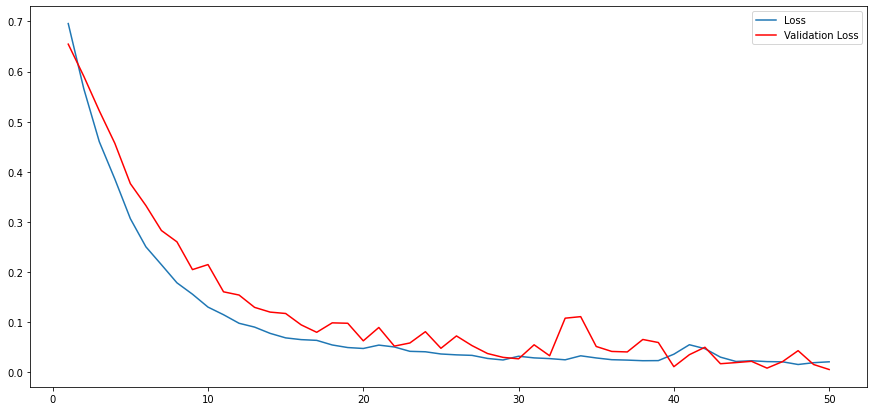

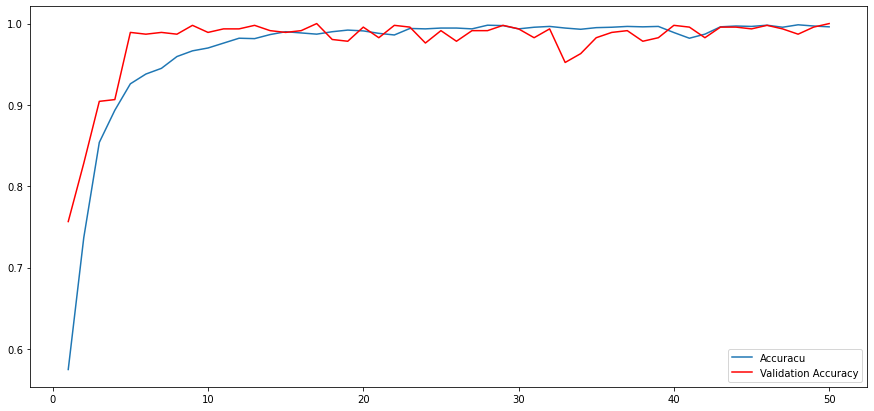

In [2]:
# Plot the model's accuracy and loss
p = plotter(history)

In [3]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions:")
predictions = model.predict(x_test[:3])
print(predictions)
print("Real targets:")
print(y_test[:3])



Evaluate on test data
5/5 [==============================] - 0s 39ms/step - loss: 0.0075 - accuracy: 0.9984
test loss, test acc: [0.0074686878360807896, 0.9983713626861572]
Generate predictions:
[[0.9984314 ]
 [0.00323114]
 [0.9868022 ]]
Real targets:
[1. 0. 1.]
